In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(url)

In [47]:
# Display basic info
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Age  Gender (Female=0, Male=1)  Height (cm)  Weight (kg)  Body Mass Index  \
0   60                          0          150           80            35.56   
1   55                          0          154           73            30.78   
2   53                          1          170          101            34.95   
3   33                          1          175           95            31.02   
4   23                          1          162           68            25.91   

   Waist Circumference (cm)  Hip Circumference (cm)  Diabetes (No=0, Yes=1)  \
0                     119.0                   104.0                       0   
1                     101.0                    98.0                       0   
2                     116.0                   112.0                       1   
3                     114.0                   114.0                       1   
4                     101.0                    97.0                       0   

   Smoking Stat

In [48]:
# Define the features and target
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [49]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
# Create and train the SVM model with a standard kernel (e.g., RBF)
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [51]:

# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)


Accuracy: 0.6813

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.68      1.00      0.81       124

    accuracy                           0.68       182
   macro avg       0.34      0.50      0.41       182
weighted avg       0.46      0.68      0.55       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


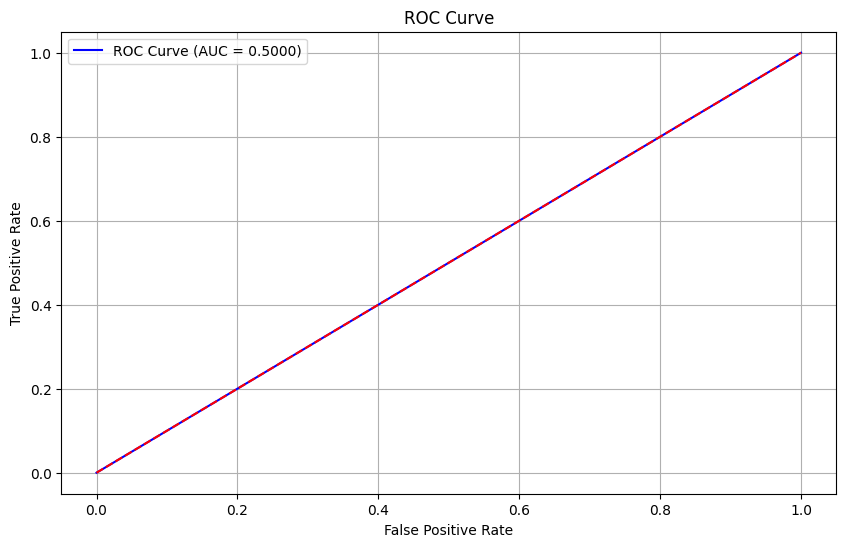

In [53]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

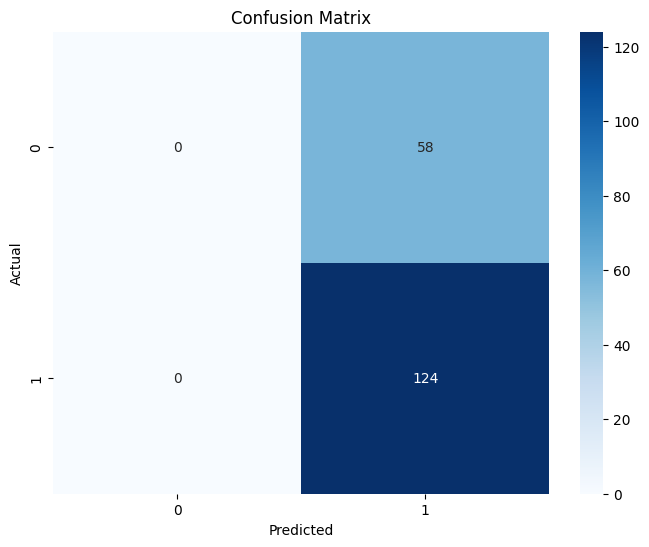

In [54]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
